In [1]:
import random
import pandas  as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import copy


In [2]:
class CqkProblem:
    def __init__(self, r, n, d, a, b, low, up):
        self.n = n
        self.r = r
        self.d = list(d)
        self.a = list(a)
        self.b = list(b)
        self.low = list(low)
        self.up = list(up)

In [3]:
def generate_cqk_problem_uncorrelated(n):
    d = []
    low = []
    up = []
    b = []
    a = []
    temp = 0
    lb = 0.0
    ub = 0.0
    lower = 10
    upper = 25
    r = 0

    for i in range(n):
        
        b.append(10 + 14*random.random())
        low.append(1 + 14*random.random())
        up.append(1 + 14*random.random())
        if low[i] > up[i]:
            temp = low[i]
            low[i] = up[i]
            up[i] = temp
        
        lb = lb + b[i]*low[i];
        ub = ub + b[i]*up[i];
        
        #Uncorrelated
        d.append(random.randint(10,25))
        a.append(random.randint(10,25))
        
    r = lb + (ub - lb)*0.7;
    
    return CqkProblem( r, n, d, a, b, low, up)

def generate_cqk_problem_correlated(n):
    d = []
    low = []
    up = []
    b = []
    a = []
    temp = 0
    lb = 0.0
    ub = 0.0
    lower = 10
    upper = 25
    r = 0

    for i in range(n):
        
        b.append(10 + 14*random.random())
        low.append(1 + 14*random.random())
        up.append(1 + 14*random.random())
        if low[i] > up[i]:
            temp = low[i]
            low[i] = up[i]
            up[i] = temp
        
        lb = lb + b[i]*low[i];
        ub = ub + b[i]*up[i];
        
        # correlated:
        
        d.append(b[i] + 5.0)
        a.append(b[i] + 5.0)
        
        
        
    r = lb + (ub - lb)*0.7;
    
    return CqkProblem( r, n, d, a, b, low, up)

In [4]:

def initial_lambda(p, lamb):
    s0=0.0
    q0=0.0
    slopes = []
    for i in range(p.n):
        slopes.append((p.b[i]/p.d[i])*p.b[i])
        s0 = s0 + (p.a[i] * p.b[i]) / p.d[i]
        q0 = q0 + (p.b[i] * p.b[i]) / p.d[i]
    lamb = (p.r-s0)/q0
    return lamb, slopes

In [5]:
def phi_lambda(p,lamb,phi,deriv,slopes,r):
    deriv = 0.0
    phi = r * -1
    x = []
    
    for i in range(p.n):
        
        x.append( (p.b[i] * lamb + p.a[i])/p.d[i])

        if x[i] < p.low[i]:
            x[i] = p.low[i]
        elif x[i] > p.up[i]:
            x[i] = p.up[i]
        else:
            deriv = deriv + slopes[i];
        phi = phi + p.b[i] * x[i];
    return deriv, phi, x

In [21]:
MAX_IT = 20
INFINITO_NEGATIVO = -999999999;
INFINITO_POSITIVO = 999999999;
def newton(p):
    lambs = [] 
    phi = 0
    lamb = 0
    alfa = INFINITO_NEGATIVO;
    beta = INFINITO_POSITIVO;
    phi_alfa = 0.0;
    phi_beta = 0.0;
    deriv = 0
    x = []
    r = p.r
    
    lamb, slopes = initial_lambda(p,lamb)
    lambs.append(lamb)
    deriv, phi, x = phi_lambda(p,lamb,phi,deriv,slopes,r)
    it = 1
    while phi != 0.0 and it <= MAX_IT:
        if phi > 0:
#             print("positivo")
            beta = lamb
            lambda_n = 0.0
            if deriv > 0.0:
                
                lambda_n = lamb - (phi/deriv)
                if abs(lambda_n - lamb) <= 0.00000000001:
                    phi = 0.0
                    break
                if lambda_n > alfa:
                    lamb = lambda_n
                else:
                    print("aqui")
                    phi_beta = phi;
#                     lamb = secant(p,x,alfa,beta,phi_alfa,phi_beta,r);
#             if deriv == 0.0:
#                 lamb = breakpoint_to_the_left(p,lamb);
#                 if lamb <= INFINITO_NEGATIVO or lamb >= INFINITO_POSITIVO:
#                     break
                
        else:
#             print("negativo")
            alfa = lamb;
            lambda_n = 0.0;

            if deriv > 0.0:
                lambda_n = lamb - (phi/deriv)
                if abs(lambda_n - lamb) <= 0.00000000001:
                    phi = 0.0
                    break
                
                if lambda_n < beta:
                    lamb = lambda_n
                else:
                    print("aqui")
                    phi_alfa = phi;
#                     lamb = secant(p,x,alfa,beta,phi_alfa,phi_beta,r);
            if deriv == 0.0:
                print("aqui 2")
#                 lamb = breakpoint_to_the_right(p,lamb)
#                 if lamb <= INFINITO_NEGATIVO or lamb >= INFINITO_POSITIVO:
#                     break
        
        
        deriv, phi, x = phi_lambda(p,lamb,phi,deriv,slopes,r)
        it = it + 1
        lambs.append(lamb)
        
    if phi == 0.0:
        return it, x, slopes, lambs
    elif alfa == beta:
        return -1
    else:
        return -2
    

In [22]:
def median(a,b,c):
    if a > b:
        if a < c:
            return a
        elif b > c:
            return b
        else:
            return c
    else:
        if a > c:
            return a
        elif b < c:
            return b
        else:
            return c

In [32]:
%%time
n = 10000
p = generate_cqk_problem_correlated(n)
it, x, slopes,lambs = newton(p)

CPU times: user 77.6 ms, sys: 4.76 ms, total: 82.3 ms
Wall time: 82 ms


In [33]:
total = 0
for i in range(n):
    total += x[i] * p.b[i]

print(total, p.r)

1514430.15470954 1514430.1547095375


In [34]:
lambs

[10.191071233284902, 11.442610899978751, 11.47798180667833, 11.478034161826125]

In [35]:
t = np.arange(0, 20, 0.5).tolist()
y = copy.deepcopy(t)
for j in range(len(t)):
    lamb = t[j]
    
    soma = 0
    
    for i in range(n):
        soma = soma + p.b[i] * median(p.low[i], (p.b[i] *lamb + p.a[i]) / p.d[i], p.up[i])
    
    y[j] = soma

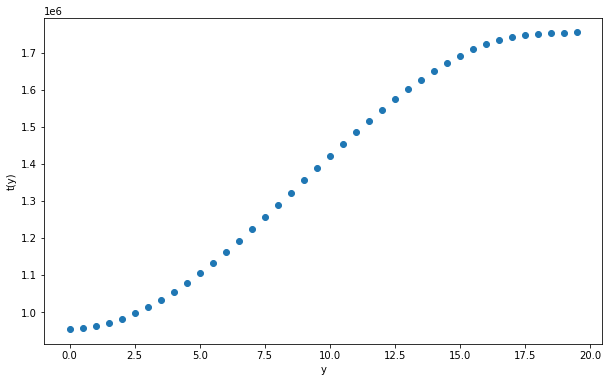

In [36]:
data = {'t': t,
        'y': y,
       }

df = pd.DataFrame (data, columns = ['t','y'])

X = DataFrame(data,columns=['t'])
y = DataFrame(data,columns=['y'])

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('y')
plt.ylabel('t(y)')
plt.show()

In [31]:
slopes

[32.24155504904833,
 19.28767507982835,
 12.403841897092445,
 14.163057895812305,
 23.231605958123133,
 14.619086343079353,
 17.288240017110663,
 8.158426038053335,
 14.94754057872228,
 11.848693135001746]